# Google Drive connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read saved xlsx files

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)   #this displays the dataframe in full width
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import sklearn
from simpletransformers.classification import ClassificationModel
import io
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Validation = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/Swati folder/Reddit_validation_dataset.xlsx')

In [ ]:
Validation_diff = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/2985 Dataset/Reddit_validation_diff_dataset.xlsx')

In [ ]:
Validation_test_diff = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/2985 Dataset/Reddit_test_diff_dataset.xlsx')

# Removal of Stopwords & Punctuations

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
Validation_diff['text_w/o_stopwords'] = Validation_diff['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
Validation_diff['text_w/o_punctuations'] = Validation_diff['text_w/o_stopwords'].str.replace(r'[^\w\s]+', '')

In [ ]:
Validation['text_w/o_stopwords'] = Validation['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
Validation['text_w/o_punctuations'] = Validation['text_w/o_stopwords'].str.replace(r'[^\w\s]+', '')

In [ ]:
Validation_diff[Validation_diff['text_w/o_punctuations'] == ''].index

Int64Index([], dtype='int64')

In [ ]:
Validation_diff.shape

(1180, 4)

In [ ]:
Validation_diff.drop(Validation_diff.index[Validation_diff['id'] == 'li8y5a'], inplace=True) # This is a dirty entry and so should be deleted
Validation_diff.drop(Validation_diff.index[Validation_diff['id'] == 'k00q2a'], inplace=True)  # This is a dirty entry and so should be deleted

In [ ]:
Validation_diff.shape

(1178, 4)

In [ ]:
Validation_diff = Validation_diff.reset_index(drop=True)

# Split large sentences into sub-sentences

In [ ]:
n = 128
Validation['split_text'] = ''
for i in range(len(Validation)):
  current_text = Validation['text_w/o_punctuations'][i]
  current_text = current_text.split()
  current_text_split = [' '.join(current_text[j:j+n]) for j in range(0,len(current_text),n)]

  Validation['split_text'][i] = current_text_split

In [ ]:
n = 128
Validation_diff['split_text'] = ''
for i in range(len(Validation_diff)):
  current_text = Validation_diff['text_w/o_punctuations'][i]
  current_text = current_text.split()
  current_text_split = [' '.join(current_text[j:j+n]) for j in range(0,len(current_text),n)]

  Validation_diff['split_text'][i] = current_text_split

# Loading the Pre-trained Model

In [ ]:
# Run following command to resolve "ModuleNotFoundError: No module named 'simpletransformers'" Error
!pip install simpletransformers

In [ ]:
# loading trained model
import pickle
with open('/content/drive/MyDrive/Trained_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Model based prediction
1. For each reddit text, model predicts class label
2. In case of sub-texts, model predicts label for each sub-text and counts frequency of label occurence to find final label


In [ ]:
Validation['predictions'] = ''
Validation['Max_prediction'] = ''
# Validation['prediction_w/_probability'] = ''
# Validation['avg_prob_predictions_class0'] = ''
# Validation['avg_prob_predictions_class1'] = ''

In [ ]:
Validation_diff['predictions'] = ''
Validation_diff['Max_prediction'] = ''

In [ ]:
# FOR VALIDATION DATASET
for i in range(len(Validation)):
  print("***********LOOP NO:",i,"BEGINS***********")
  curr_texts=Validation['split_text'][i]
  predictions, raw_outputs = model.predict(curr_texts)
  Validation['predictions'][i] = predictions

  if (((predictions == 1).sum() > (predictions == 0).sum()) or ((predictions == 1).sum() == (predictions == 0).sum())):
    Validation['Max_prediction'][i] = 1
  else:
    Validation['Max_prediction'][i] = 0

  # probas=np.asarray(raw_outputs)
  # probas=softmax(probas,axis=1)
  # Validation['prediction_w/_probability'][i]=probas

  # probas_class_0,probas_class_1 = np.split(probas,2,axis=1)
  # probas_class_0 = probas_class_0.flatten()
  # probas_class_1 = probas_class_1.flatten()
  # Validation['avg_prob_predictions_class0'][i] = mean(probas_class_0)
  # Validation['avg_prob_predictions_class1'][i] = mean(probas_class_1)
  print("***********LOOP NO:",i,"ENDS HERE***********\n\n")

In [ ]:
# FOR VALIDATION_DIFF DATASET
for i in range(len(Validation_diff)):
  print("***********LOOP NO:",i,"BEGINS***********")
  curr_texts=Validation_diff['split_text'][i]
  predictions, raw_outputs = model.predict(curr_texts)
  Validation_diff['predictions'][i] = predictions

  if (((predictions == 1).sum() > (predictions == 0).sum()) or ((predictions == 1).sum() == (predictions == 0).sum())):
    Validation_diff['Max_prediction'][i] = 1
  else:
    Validation_diff['Max_prediction'][i] = 0
  print("***********LOOP NO:",i,"ENDS HERE***********\n\n")

In [ ]:
Validation_diff['Max_prediction'].value_counts()

0    195
1    101
Name: Max_prediction, dtype: int64

In [ ]:
Validation.to_excel(r'/content/drive/MyDrive/Reddit Migraine Dataset/Swati folder/Predicted_Reddit_validation_dataset2.xlsx', index = False) #Exporting the validation dataset with predictions

In [ ]:
Validation_diff.to_excel(r'/content/drive/MyDrive/Reddit Migraine Dataset/2985 Dataset/Predicted_Reddit_validation_diff_dataset.xlsx', index = False) #Exporting the validation dataset with predictions

# Test Dataset
Here we have manually annotated dataset which we are not going to test against the model predictions

In [ ]:
Test_df = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/Reddit_test_dataset Manual Annotation.xlsx')

In [ ]:
Test_df.columns

Index(['id', 'text', 'Y or N Self-Reporting Migraine'], dtype='object')

In [ ]:
len(Test_df)

302

In [ ]:
Test_df['Y or N Self-Reporting Migraine'].value_counts()

Y    226
N     76
Name: Y or N Self-Reporting Migraine, dtype: int64

In [ ]:
# Convert all 'Y' to 1 and 'N' to 0
Test_df['Y or N Self-Reporting Migraine'].replace({'Y':1,'N':0},inplace=True)

In [ ]:
Test_df['Y or N Self-Reporting Migraine'].value_counts()

1    226
0     76
Name: Y or N Self-Reporting Migraine, dtype: int64

In [ ]:
Y_test=Test_df['Y or N Self-Reporting Migraine']

In [ ]:
test_text=list(Test_df['text'])

In [ ]:
predictions, raw_outputs = model.predict(test_text)

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:
import numpy as np

def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def softmax(x, axis=None):
    x = x - x.max(axis=axis, keepdims=True)
    y = np.exp(x)
    return y / y.sum(axis=axis, keepdims=True)

In [ ]:
pre=pd.DataFrame(predictions,columns = {'0':'Pre'})
probas = np.asarray(raw_outputs)
probas=softmax(probas, axis=1)
probas

In [ ]:
# This is a one time activity
# !pip install scikit-plot

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        76
           1       0.91      0.96      0.94       226

    accuracy                           0.90       302
   macro avg       0.89      0.84      0.86       302
weighted avg       0.90      0.90      0.90       302

overall Accuracy: 0.9039735099337748


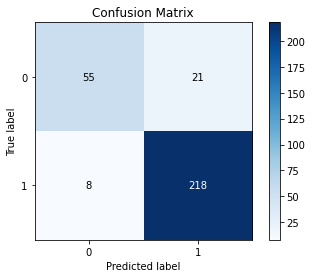

--------------------------


In [ ]:
import scikitplot
import matplotlib.pyplot as plt

Y_test=Y_test
predicted= pre

cm = confusion_matrix(Y_test, predicted)
accuracy =accuracy_score(Y_test, predicted)
report = classification_report(Y_test, predicted)
print(report)
print('overall Accuracy:',accuracy)
scikitplot.metrics.plot_confusion_matrix(Y_test,  predicted)
plt.show()

print('--------------------------')

In [ ]:
Test_df = pd.concat([Test_df, predicted], axis=1)

In [ ]:
Test_df.rename(columns = {'Y or N Self-Reporting Migraine':'Manual labels', '0':'Model predicted label'}, inplace = True)

In [ ]:
Test_df['Model predicted label'].value_counts() #this is what model predicted

1    239
0     63
Name: Model predicted label, dtype: int64

In [ ]:
Test_df['Manual labels'].value_counts() #this is what practitioners say

1    226
0     76
Name: Manual labels, dtype: int64

In [ ]:
Test_df.to_excel(r'/content/drive/MyDrive/Reddit Migraine Dataset/Results by RoBERTa Model/roberta_predicted_test_reddit_dataset.xlsx', index = False)

# Test Dataset by dividing into sub texts

In [ ]:
# Test_df['text_w/o_stopwords'] = Test_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# Test_df['text_w/o_punctuations'] = Test_df['text_w/o_stopwords'].str.replace(r'[^\w\s]+', '')

In [ ]:
n = 128
Test_df['split_text'] = ''
for i in range(len(Test_df)):
  current_text = Test_df['text'][i]
  current_text = current_text.split()
  current_text_split = [' '.join(current_text[j:j+n]) for j in range(0,len(current_text),n)]

  Test_df['split_text'][i] = current_text_split

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Divide the text into small subtexts
Test_df['predictions']=''
Test_df['Max_prediction']=''

for i in range(len(Test_df)):
  print("***********LOOP NO:",i,"BEGINS***********")
  curr_texts=Test_df['split_text'][i]
  predictions, raw_outputs = model.predict(curr_texts)
  Test_df['predictions'][i] = predictions

  if (((predictions == 1).sum() > (predictions == 0).sum()) or ((predictions == 1).sum() == (predictions == 0).sum())):
    Test_df['Max_prediction'][i] = 1
  else:
    Test_df['Max_prediction'][i] = 0

  print("***********LOOP NO:",i,"ENDS HERE***********\n\n")

              precision    recall  f1-score   support

           0       0.83      0.72      0.77        76
           1       0.91      0.95      0.93       226

    accuracy                           0.89       302
   macro avg       0.87      0.84      0.85       302
weighted avg       0.89      0.89      0.89       302

overall Accuracy: 0.8940397350993378


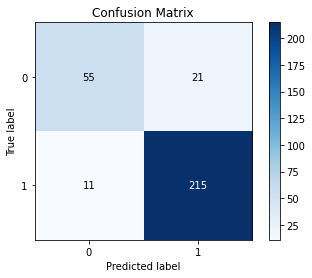

--------------------------


In [ ]:
import scikitplot
import matplotlib.pyplot as plt

Y_test=Y_test
predicted= list(Test_df['Max_prediction'])

cm = confusion_matrix(Y_test, predicted)
accuracy =accuracy_score(Y_test, predicted)
report = classification_report(Y_test, predicted)
print(report)
print('overall Accuracy:',accuracy)
scikitplot.metrics.plot_confusion_matrix(Y_test,  predicted)
plt.show()

print('--------------------------')

In [ ]:
Test_df.rename(columns = {'Max_prediction':'Model prediction for split text'}, inplace = True)

In [ ]:
Test_df['Model predicted label'].value_counts() #this is what model predicted

1    239
0     63
Name: Model predicted label, dtype: int64

In [ ]:
Test_df['Model prediction for split text'].value_counts() #this is what model predicted

1    236
0     66
Name: Model prediction for split text, dtype: int64

In [ ]:
Test_df['Manual labels'].value_counts() #this is what practitioners say

1    226
0     76
Name: Manual labels, dtype: int64

In [ ]:
Test_df.to_excel(r'/content/drive/MyDrive/Reddit Migraine Dataset/Results by RoBERTa Model/roberta_predicted_test_reddit_dataset.xlsx', index = False)